In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


iris_set = sns.load_dataset("iris")
iris_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
iris_set['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

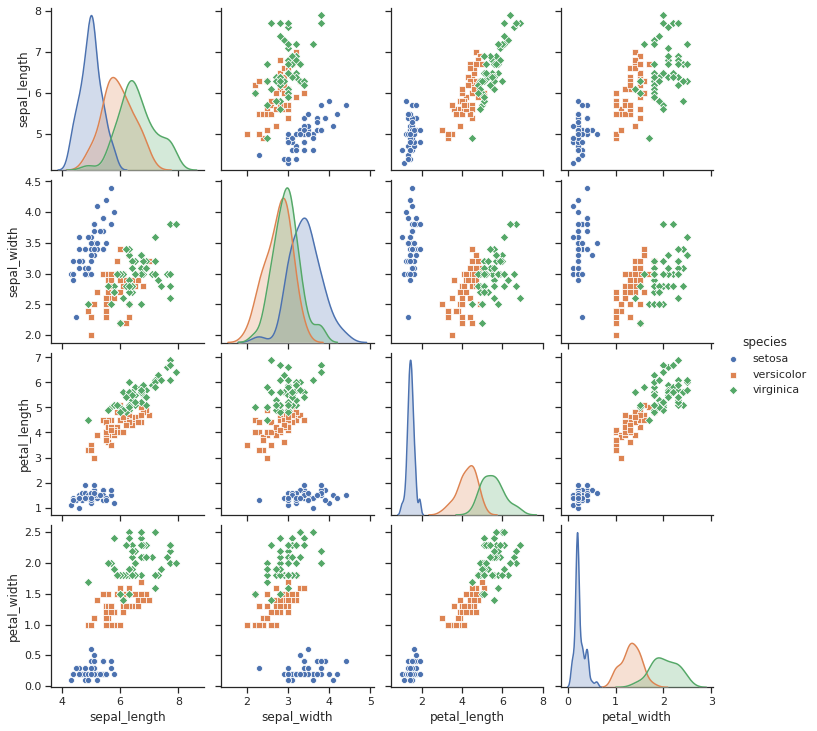

In [3]:
sns.set(style="ticks")
graph = sns.pairplot(iris_set, hue="species", markers=["o", "s", "D"])

In [4]:
iris_set.iloc[:,0:4]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
iris_set

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
iris_set.iloc[:,4]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder

X = iris_set.iloc[:,0:4].values
y = iris_set.iloc[:,4].values

encoder =  LabelEncoder()

y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

print(Y[:10])

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=77) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [28]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [29]:
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=1)

Epoch 1/100
108/108 [==============================] - 0s 2ms/step - loss: 5.7763 - accuracy: 0.3333 - val_loss: 4.4724 - val_accuracy: 0.4167
Epoch 2/100
108/108 [==============================] - 0s 927us/step - loss: 4.4706 - accuracy: 0.3333 - val_loss: 3.6141 - val_accuracy: 0.4167
Epoch 3/100
108/108 [==============================] - 0s 907us/step - loss: 3.6974 - accuracy: 0.3426 - val_loss: 3.0800 - val_accuracy: 0.4167
Epoch 4/100
108/108 [==============================] - 0s 893us/step - loss: 3.1291 - accuracy: 0.4167 - val_loss: 2.6334 - val_accuracy: 0.5000
Epoch 5/100
108/108 [==============================] - 0s 914us/step - loss: 2.6222 - accuracy: 0.5926 - val_loss: 2.2274 - val_accuracy: 0.5000
Epoch 6/100
108/108 [==============================] - 0s 893us/step - loss: 2.1766 - accuracy: 0.6111 - val_loss: 1.9123 - val_accuracy: 0.5833
Epoch 7/100
108/108 [==============================] - 0s 888us/step - loss: 1.8207 - accuracy: 0.4907 - val_loss: 1.7043 - val_accu

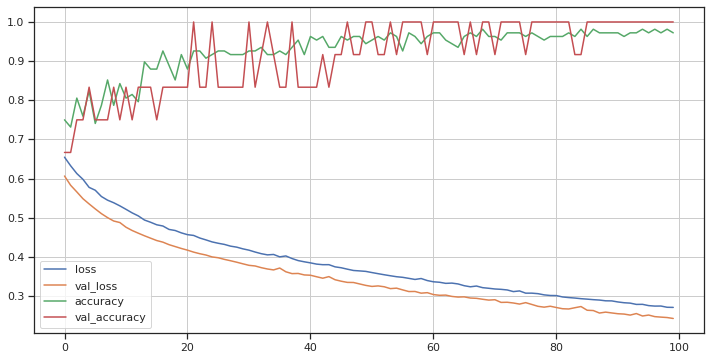

In [20]:
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.grid()
plt.show()

In [21]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy : {:.2f}".format(accuracy))

1/1 [==============================] - 0s 1ms/step - loss: 0.2630 - accuracy: 0.9000
Accuracy : 0.90
